In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
! pip install missingno
import missingno as mno
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv("../input/bluebook-for-bulldozers/TrainAndValid.csv",parse_dates=['saledate'])

In [4]:
print("The shape of the data is",df.shape)
print("There are",df.shape[0],"rows")
print("There are",df.shape[1],"columns")

The shape of the data is (412698, 53)
There are 412698 rows
There are 53 columns


In [5]:
df.sample(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
382335,4292631,37000.0,2288413,3539,172,1.0,2006,1675.0,Low,2011-07-26,416D,416,D,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Texas,BL,Backhoe Loaders,Two Wheel Drive,EROPS w AC,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15721,1191296,20500.0,321813,3542,121,3.0,2003,751.0,Low,2009-06-11,420D,420,D,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,West Virginia,BL,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,Reversible,No,Standard,Powershuttle,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102344,1422528,47000.0,1413435,3877,132,1.0,1985,NaN,NaN,2001-06-05,980C,980,C,NaN,NaN,Medium,Wheel Loader - 275.0 to 350.0 Horsepower,Utah,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,29.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
260249,1794340,9500.0,1132739,9560,132,6.0,1000,NaN,NaN,1994-04-07,843,843,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,Maryland,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153244,1532794,29500.0,1532199,7052,132,2.0,1995,NaN,NaN,1998-12-04,307,307,NaN,NaN,NaN,Mini,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
54113,1301128,17000.0,1324815,4123,132,28.0,1972,NaN,NaN,2006-06-02,D6C,D6,C,NaN,NaN,Medium,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",Mississippi,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
363376,2528871,35000.0,265822,3824,149,1.0,1998,10718.0,Medium,2011-03-30,950G,950,G,NaN,NaN,Medium,Wheel Loader - 175.0 to 200.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,Hydraulic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Command Control
244917,1754354,33000.0,1407504,259,132,1.0,1994,NaN,NaN,2003-03-19,D65EX-12,D65,EX,-12,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
383686,4307215,72500.0,2280573,12709,172,1.0,2008,1314.0,Medium,2011-09-20,D5KXL,D5,K,NaN,XL,NaN,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Washington,TTT,Track Type Tractors,NaN,EROPS w AC,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,Multi Shank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Different

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
# numerical variables
nums=df.describe().T
nums

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0


In [8]:
numcols=nums.index.tolist()
print(numcols)
print("There are",len(nums),"numerical variables")


['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter']
There are 8 numerical variables


In [9]:
# replacing zero values as missing
df['MachineID'].replace(0, np.NaN, inplace = True)
df['auctioneerID'].replace(0, np.NaN, inplace = True)
df['MachineHoursCurrentMeter'].replace(0, np.NaN, inplace = True)


In [10]:
# categorical variables
cats=df.describe(include=["O"]).T

In [11]:
catcols = cats.index.tolist()
print(catcols)
print(len(catcols))

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
44


## **DATA PREPROCESSING**
* Data is of mixed data types
* Date is already changed to datetime 
* There are 8 numerical variables, 44 categorical variables
* Sale Price is the target variable
* 13 non-null variables.

In [12]:
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()*100 / df.shape[0], columns =["Percentage of null values"])
null_columns["Total Nan Values"]=df[df.columns[df.isnull().any()]].isnull().sum()
# null_columns=null_columns.sort_values(by=['Percentage of null values'])
null_columns

,Percentage of null values,Total Nan Values
MachineID,0.000485,2
auctioneerID,5.008990,20672
MachineHoursCurrentMeter,82.149174,339028
UsageBand,82.149174,339028
fiSecondaryDesc,34.099269,140727
fiModelSeries,85.784520,354031
fiModelDescriptor,81.871490,337882
ProductSize,52.485110,216605
Drive_System,74.051970,305611
Enclosure,0.080931,334


* More than 5% is missing for every column
* Only 1 column has < 1 % missing , the other has 4.8% missing
* CCA on Enclosure column, Impute auctioneer ID

In [13]:
# make a list of all the null columns
null_cols = null_columns.index.tolist()
print(null_cols)

['MachineID', 'auctioneerID', 'MachineHoursCurrentMeter', 'UsageBand', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


<AxesSubplot:>

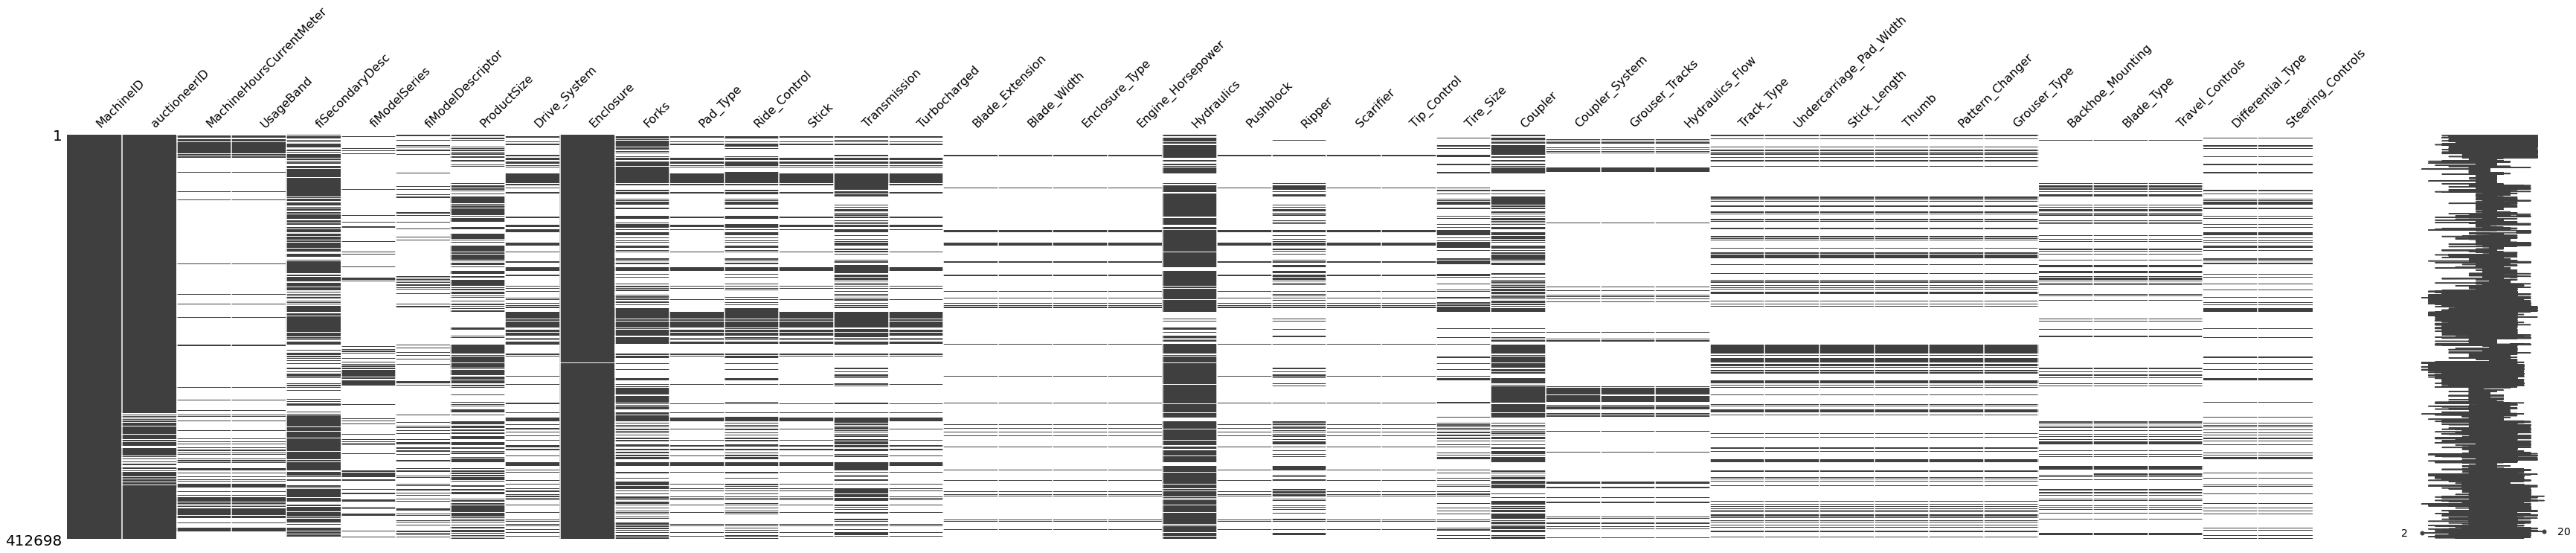

In [14]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

<AxesSubplot:>

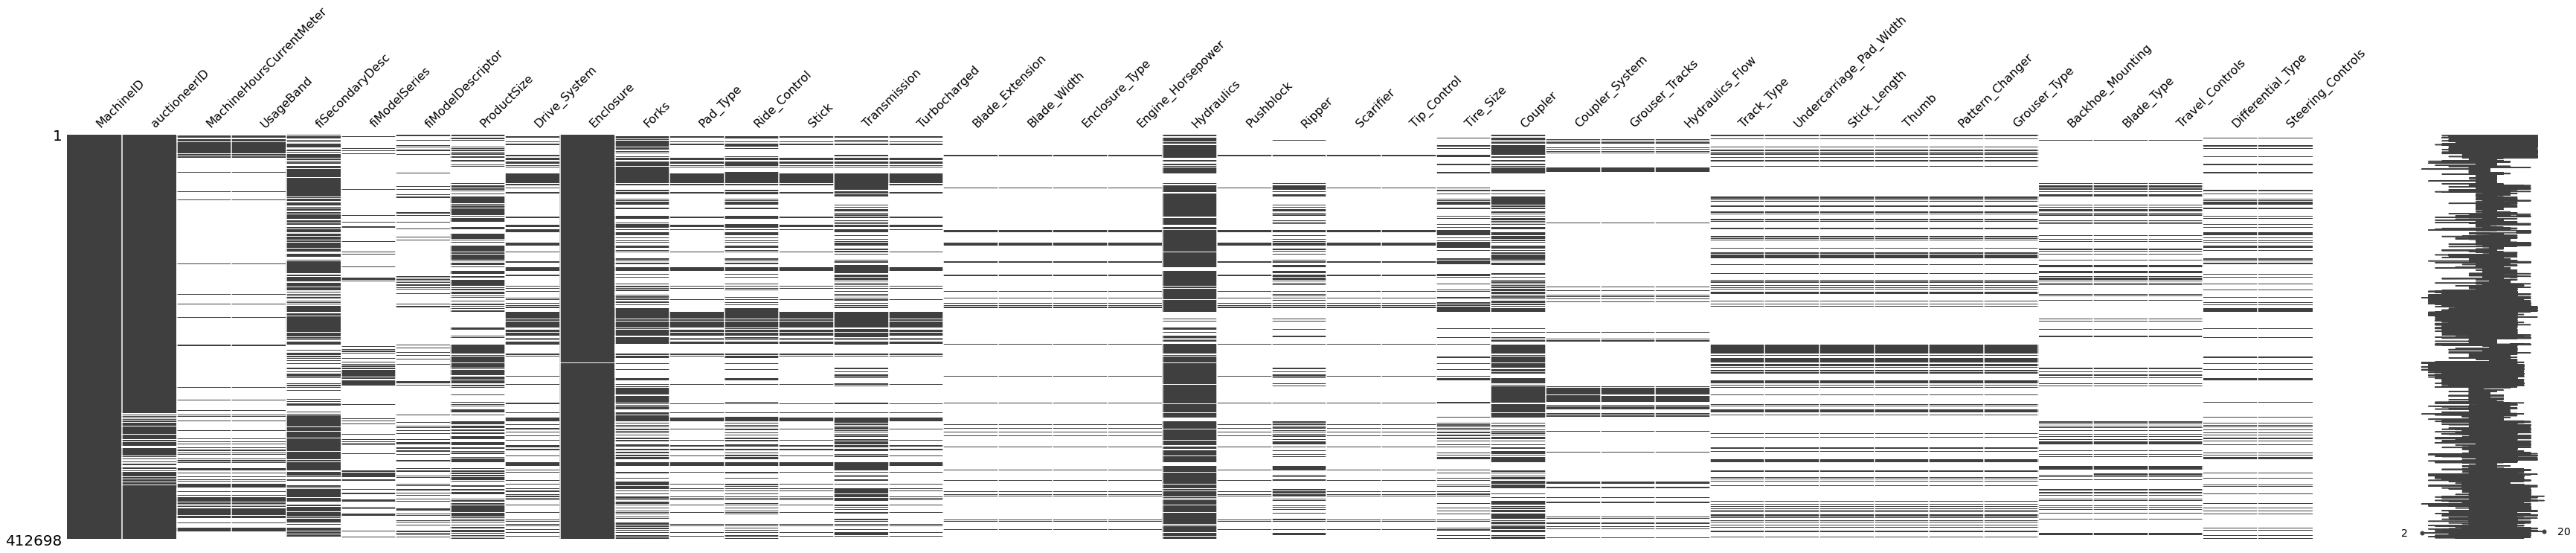

In [15]:
# heatmap to visualize the missing columns
mno.matrix(df[null_cols], figsize=(60,10))

<AxesSubplot:>

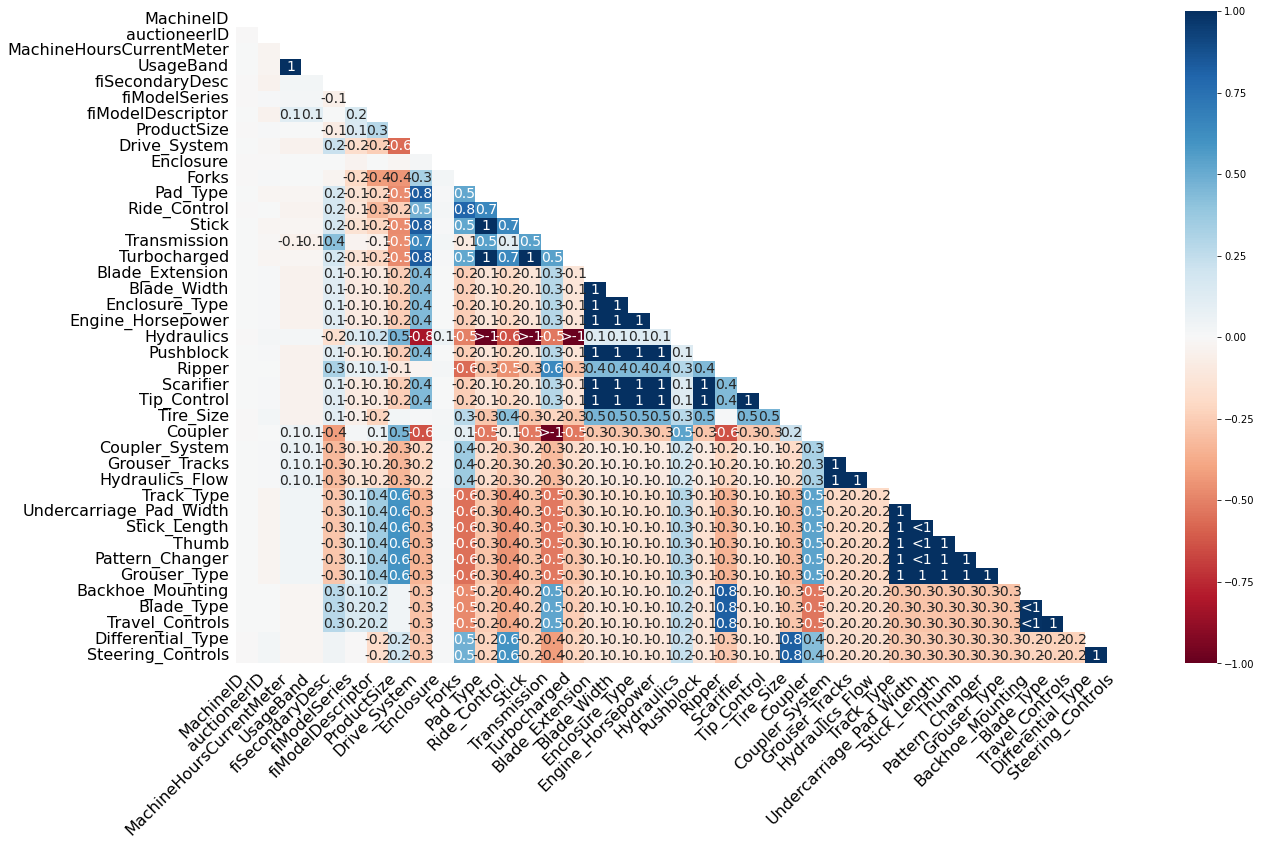

In [16]:
mno.heatmap(df)

# **INSIGHTS**
**POSITIVE CORRELATION**
* Stick :: Pad_Type
* MachineHoursCurrentMeter :: UsageBand
* Turbocharged :: Pad_Type
* Turbocharged :: Stick
* Blade_Width :: Blade_Extension
* Enclosure_Type :: Blade_Extension
* Enclosure_Type :: Blade_Width
* Engine_Horsepower :: Blade_Extension
* Engine_Horsepower:: Blade_Width
* Engine_Horsepower :: Enclosure_Type
* Pushblock :: Blade_Extension 
* Pushblock :: Blade_Width
* Pushblock ::Enclosure_Type
* Pushblock ::Engine_Horsepower
* Scarifier :: Blade_Extension
* Scarifier :: Blade_Width
* Scarifier :: Enclosure_Type
* Scarifier :: Engine_Horsepower
* Scarifier :: Pushblock
* Tip_Control :: Scarifier
* Tip_Control :: Engine_Horsepower
* Tip_Control :: Enclosure_Type
* Tip_Control :: Blade_Width
* Tip_Control :: Blade_Extension
* Tip_Control :: Pushblock
* Grouser_Tracks :: Coupler_System
* Hydraulics_Flow :: Coupler_System
* Hydraulics_Flow ::  Grouser_Tracks
* Undercarriage_Pad_Width :: Track_Type
* Stick_Length :: Track_Type
* Stick_Length :: Undercarriage_Pad_Width
* Thumb :: Track_Type
* Thumb :: Undercarriage_Pad_Width
* Thumb :: Stick_Length
* Pattern_Changer ::  Track_Type
* Pattern_Changer :: Thumb
* Pattern_Changer :: Undercarriage_Pad_Width
* Pattern_Changer :: Stick_Length
* Grouser_Type :: Track_Type
* Grouser_Type :: Undercarriage_Pad_Width
* Grouser_Type :: Stick_Length
* Grouser_Type :: Thumb
* Grouser_Type :: Pattern_Changer
* Blade_Type :: Backhoe_Mounting
* Travel_Controls :: Backhoe_Mounting
* Travel_Controls :: Blade_Type
* Steering_Controls :: Differential_Type

**NEGATIVE CORRELATION**
* Hydraulics :: Pad_Type
* Hydraulics :: Stick
* Hydraulics :: Turbocharged
* Coupler :: Transmission

**MCAR**
1. Enclosure (<1%)
**MAR**
1. 
* Undercarriage_Pad_Width
* Thumb
* Pattern_Changer
* Stick_Length
* Grouser_Type
* Track_Type
2. 
* Travel_Controls
* Blade_Type
* Backhoe_Mounting
3.
* Stick
* Turbocharged
* Pad_Type
4. 
* Differential_Type
* Steering_Controls
5. 
* Coupler_System
* Grouser_Tracks
* Hydraulics_Flow
6. 
* Scarifier
* Tip_Control
* Pushblock
* Engine_Horsepower
* Enclosure_Type
* Blade_Width
* Blade_Extension






In [17]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        2
ModelID                          0
datasource                       0
auctioneerID                 20672
YearMade                         0
MachineHoursCurrentMeter    339028
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:>

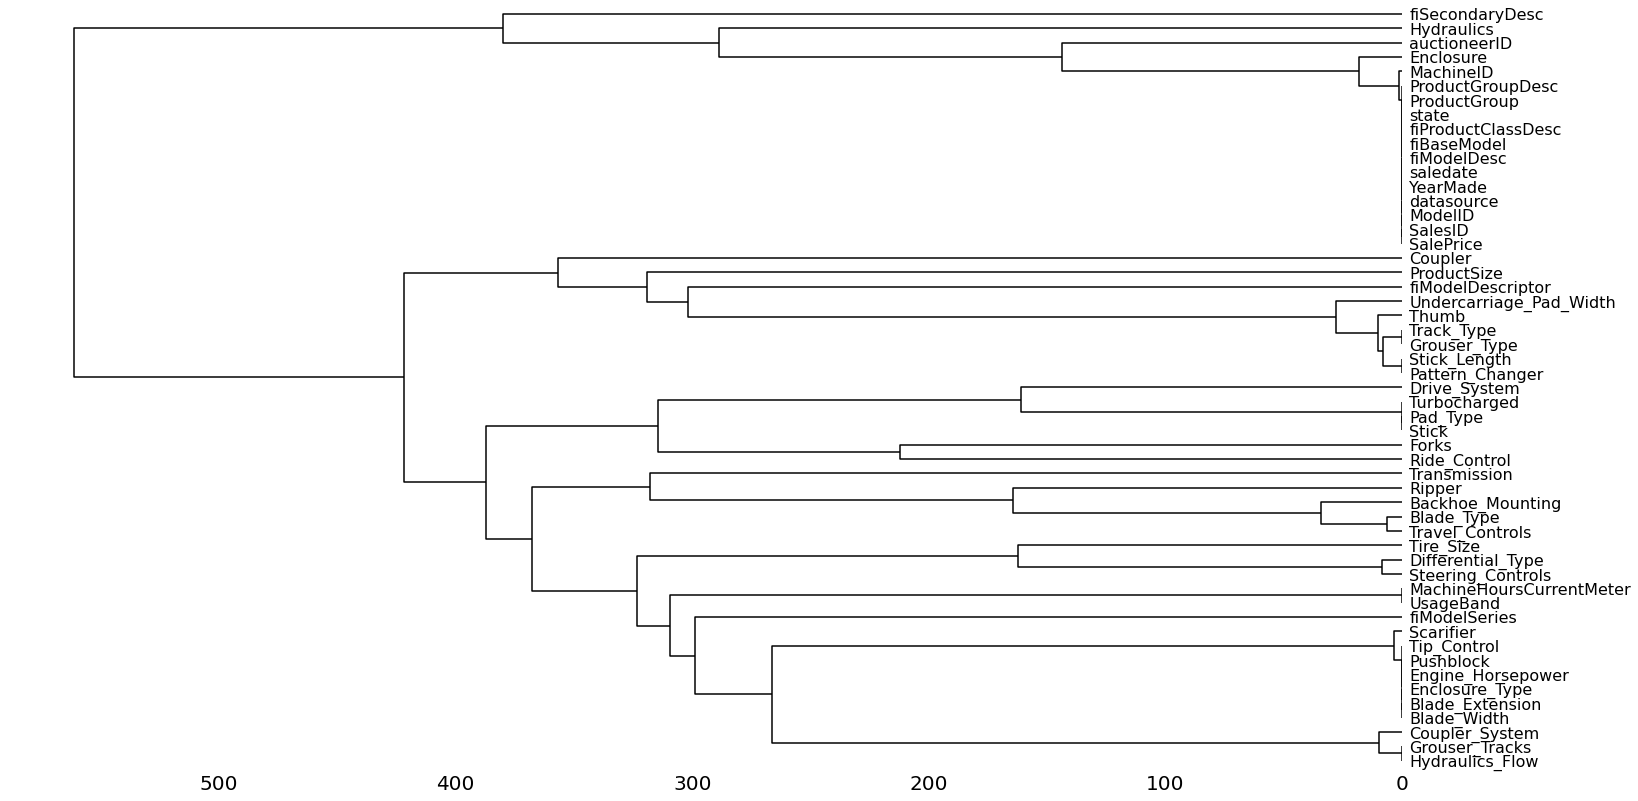

In [18]:
mno.dendrogram(df)

In [19]:
# duplicate entries
print("Duplicate entries initially:", df.duplicated().sum())
df = df.drop_duplicates(keep=False)
print("Duplicate entries after dropping:", df.duplicated().sum())

Duplicate entries initially: 0
Duplicate entries after dropping: 0


In [20]:
for column in df.columns:
    print(column + ":" + str(len(df[column].unique())))
    if(len(df[column].unique())<100):
        print(column + ':' + str(df[column].unique()))
    print('\n')

SalesID:412698


SalePrice:954


MachineID:348808


ModelID:5281


datasource:6
datasource:[121 132 136 149 172 173]


auctioneerID:30
auctioneerID:[ 3.  1.  2. 11.  4.  7. 99.  6.  5. 18. 17. 22. 20. 14. 16. 21.  9. 13.
 12. 23. 10. 15. 19.  8. 28. 25. 27. 24. nan 26.]


YearMade:73
YearMade:[2004 1996 2001 2007 1993 2008 1000 1998 1999 2003 1991 2000 2005 1995
 2006 2002 1984 1988 1980 1992 1987 1997 1971 1978 1989 1985 1979 1976
 1994 1982 1990 1974 1968 1966 1983 1986 1981 1970 1977 1975 1973 1965
 1967 2009 2010 1969 1972 1964 1957 1958 1963 1919 1920 1950 1948 1952
 1942 1956 1954 1953 1955 1959 1960 1961 1962 1951 1937 1949 1947 2012
 2013 2011 2014]


MachineHoursCurrentMeter:15633


UsageBand:4
UsageBand:['Low' 'High' 'Medium' nan]


saledate:4013


fiModelDesc:5059


fiBaseModel:1961


fiSecondaryDesc:178


fiModelSeries:130


fiModelDescriptor:141


ProductSize:7
ProductSize:[nan 'Medium' 'Small' 'Large / Medium' 'Mini' 'Large' 'Compact']


fiProductClassDesc:74
fiProductCla

In [21]:
# looking at unique values yto know which data types to change
pd.set_option("Display.max_rows", None)
# nunique counts the unique values in every column and dropna=true means we ignore nan values and .sort sorts the values in ascending order
print(df.nunique(dropna=True).sort_values())

Engine_Horsepower                2
Stick                            2
Pushblock                        2
Scarifier                        2
Forks                            2
Grouser_Tracks                   2
Track_Type                       2
Coupler_System                   2
Turbocharged                     2
Backhoe_Mounting                 2
Blade_Extension                  2
UsageBand                        3
Hydraulics_Flow                  3
Pattern_Changer                  3
Coupler                          3
Tip_Control                      3
Grouser_Type                     3
Enclosure_Type                   3
Ride_Control                     3
Thumb                            3
Ripper                           4
Differential_Type                4
Drive_System                     4
Pad_Type                         4
Steering_Controls                5
ProductGroupDesc                 6
ProductGroup                     6
datasource                       6
Blade_Width         

In [22]:
# dataframe with null columns
mynull_cols = df[null_cols]
mynull_cols.sample(10)

,MachineID,auctioneerID,MachineHoursCurrentMeter,UsageBand,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
325112,778231.0,2.0,1442.0,Medium,G,NaN,NaN,Medium,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
255251,1540274.0,14.0,NaN,NaN,NaN,-2,NaN,NaN,Four Wheel Drive,EROPS,Yes,None or Unspecified,No,Extended,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341743,1696025.0,1.0,NaN,NaN,H,NaN,NaN,NaN,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
127464,1528564.0,1.0,NaN,NaN,NaN,NaN,NaN,Medium,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
95022,1377899.0,99.0,NaN,NaN,NaN,NaN,NaN,Small,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,28 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
60518,1448020.0,1.0,NaN,NaN,B,NaN,NaN,NaN,NaN,EROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
286296,1376926.0,1.0,NaN,NaN,NaN,NaN,SR,Mini,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
330758,1649659.0,NaN,NaN,NaN,H,NaN,NaN,Medium,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Spin,Conventional
73595,1294307.0,10.0,NaN,NaN,H,II,LGP,Medium,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
22215,53101.0,3.0,3528.0,Medium,PX,-12,NaN,Medium,NaN,OROPS,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [23]:
# categoical features
categoricalfeatures = df.select_dtypes(include='object').columns
cat=df[categoricalfeatures].copy()
catdf=pd.DataFrame(cat)
cat.sample(5)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
24009,NaN,C451,C451,NaN,NaN,NaN,Small,"Hydraulic Excavator, Track - 14.0 to 16.0 Metr...",Montana,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
343057,NaN,EX210LCK5,EX210,NaN,LC,K5,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
315959,High,D6NXL,D6,N,NaN,XL,Medium,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",New Jersey,TTT,Track Type Tractors,NaN,EROPS w AC,NaN,NaN,NaN,NaN,Powershift,NaN,NaN,NaN,NaN,NaN,3 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
257301,NaN,L130,L130,NaN,NaN,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,Washington,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
403575,Low,307C,307,C,NaN,NaN,Mini,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN


In [24]:
numericalfeatures = df.select_dtypes(include='number').columns
num=df[numericalfeatures].copy()
numdf=pd.DataFrame(num)
num.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
13332,1183034,45000.0,983344.0,1263,121,3.0,1997,16583.0
165154,1589012,11000.0,1259314.0,7999,132,1.0,1999,NaN
97213,1413248,25000.0,30554.0,3538,132,1.0,1997,NaN
181723,1615176,14500.0,1446479.0,8089,132,6.0,1983,NaN
66767,1339347,122000.0,1297992.0,4035,132,2.0,1988,NaN


# **HANDLING MISSING VALUES**
 **1.COMPLETE CASE ANALYSIS**

In [25]:
# look for columns that have less than 5% missing null values
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols

['MachineID', 'Enclosure']

In [26]:
df[cols].sample(7)

,MachineID,Enclosure
185926,1425097.0,EROPS
298728,1037970.0,EROPS
303740,48158.0,OROPS
311713,1117656.0,EROPS
58558,1221916.0,OROPS
199401,1076688.0,OROPS
178186,1219510.0,EROPS w AC


In [27]:
# see how much you lose when you drop them all
len(df[cols].dropna())/len(df)

0.9991858453396915

In [28]:
dfnew = df[cols].dropna()
df.shape, dfnew.shape

((412698, 53), (412362, 2))

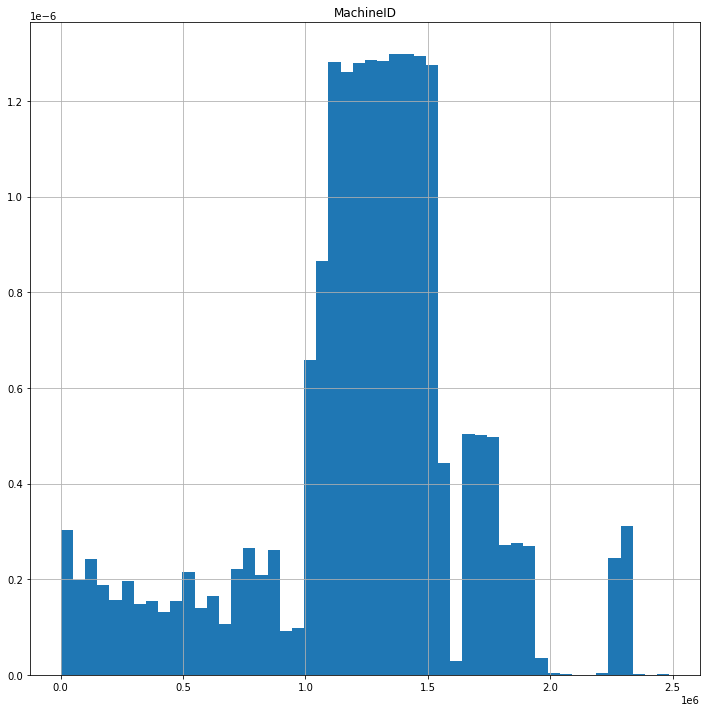

In [29]:
# visualize the distribution 
dfnew.hist(bins=50,density = True, figsize = (12,12))
dfnew.columns
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

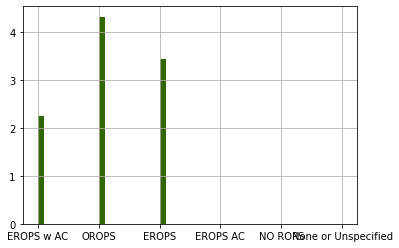

In [30]:
# check for changes in the distribution for numerical variables
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['Enclosure'].hist(bins=50,ax=ax,density = True, color='red')
# data after cca
dfnew['Enclosure'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show

<AxesSubplot:ylabel='Density'>

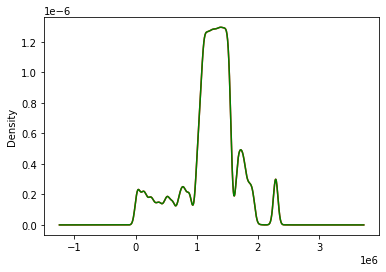

In [31]:
# density plot () for numeric variables only
fig=plt.figure()
ax = fig.add_subplot(111)
df['MachineID'].plot.density(color='red')
dfnew['MachineID'].plot.density(color='green')

In [32]:
# percentage change for categorical variables
temp =pd.concat([
    df['Enclosure'].value_counts()/len(df),
    dfnew['Enclosure'].value_counts()/len(dfnew)
],
axis=1)
temp.columns=['original','cca']
temp

,original,cca
OROPS,0.431238,0.431589
EROPS,0.343518,0.343797
EROPS w AC,0.224380,0.224558
EROPS AC,0.000044,0.000044
NO ROPS,0.000007,0.000007
None or Unspecified,0.000005,0.000005


# **FINDINGS**
CCA does not work at all so we won't use it.

**2. MEAN/MEDIAN IMPUTATION FOR NUMERICAL VARIABLES**

In [33]:
df.isnull().mean()

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000005
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050090
YearMade                    0.000000
MachineHoursCurrentMeter    0.821492
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [34]:
nullnumcols = [var for var in num.columns if num[var].isnull().mean()>0]
numimpute=df[nullnumcols].copy()
numimpute.isna().mean()

MachineID                   0.000005
auctioneerID                0.050090
MachineHoursCurrentMeter    0.821492
dtype: float64

In [35]:
numimpute.columns

Index(['MachineID', 'auctioneerID', 'MachineHoursCurrentMeter'], dtype='object')

In [36]:
X = numimpute
y = df['SalePrice']

In [37]:
XTrain,XTest, YTrain, YTest = train_test_split(X,y,test_size=0.2,random_state=33)

In [38]:
print('The shape of XTrain is',XTrain.shape)
print('The shape of XTest is',XTest.shape)
print('The shape of YTrain is',YTrain.shape)
print('The shape of YTest is',YTest.shape)

The shape of XTrain is (330158, 3)
The shape of XTest is (82540, 3)
The shape of YTrain is (330158,)
The shape of YTest is (82540,)


In [39]:
XTrain.isnull().mean()

MachineID                   0.000003
auctioneerID                0.049961
MachineHoursCurrentMeter    0.821346
dtype: float64

In [40]:
# mean and median imputation on auctioneer ID
auctioneerID_mean=XTrain['auctioneerID'].mean()
auctioneerID_median=XTrain['auctioneerID'].median()
# mean imputation
XTrain['auctioneerID_mean'] = XTrain['auctioneerID'].fillna(auctioneerID_mean)
# median imputation
XTrain['auctioneerID_median'] = XTrain['auctioneerID'].fillna(auctioneerID_median)


In [41]:
# mean and median imputation on MachineHoursCurrentMeter
MachineHoursCurrentMeter_mean = XTrain['MachineHoursCurrentMeter'].mean()
MachineHoursCurrentMeter_median = XTrain['MachineHoursCurrentMeter'].median()
# mean imputation
XTrain['MachineHoursCurrentMeter_mean'] = XTrain['MachineHoursCurrentMeter'].fillna(MachineHoursCurrentMeter_mean)
# median imputation
XTrain['MachineHoursCurrentMeter_median'] = XTrain['MachineHoursCurrentMeter'].fillna(MachineHoursCurrentMeter_median)

In [42]:
# mean and median imputation on auctioneer ID
MachineID_mean=XTrain['MachineID'].mean()
MachineID_median=XTrain['MachineID'].median()
# mean imputation
XTrain['MachineID_mean'] = XTrain['MachineID'].fillna(MachineID_mean)
# median imputation
XTrain['MachineID_median'] = XTrain['MachineID'].fillna(MachineID_median)

In [43]:
XTrain.sample(10)

,MachineID,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median,MachineID_mean,MachineID_median
84372,314206.0,14.0,NaN,14.0,14.0,7100.901634,3193.0,314206.0,314206.0
133122,89895.0,2.0,NaN,2.0,2.0,7100.901634,3193.0,89895.0,89895.0
182642,1305493.0,2.0,NaN,2.0,2.0,7100.901634,3193.0,1305493.0,1305493.0
138623,1216504.0,11.0,NaN,11.0,11.0,7100.901634,3193.0,1216504.0,1216504.0
101670,90856.0,6.0,NaN,6.0,6.0,7100.901634,3193.0,90856.0,90856.0
24413,1178163.0,1.0,NaN,1.0,1.0,7100.901634,3193.0,1178163.0,1178163.0
22803,778502.0,3.0,9316.0,3.0,3.0,9316.000000,9316.0,778502.0,778502.0
83218,531175.0,10.0,NaN,10.0,10.0,7100.901634,3193.0,531175.0,531175.0
291123,1670969.0,1.0,NaN,1.0,1.0,7100.901634,3193.0,1670969.0,1670969.0
405067,2287124.0,1.0,3279.0,1.0,1.0,3279.000000,3279.0,2287124.0,2287124.0


In [44]:
# check for the change in variance in both variables
print("Variance of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter'].var())
print("Variance of the mean of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter_mean'].var())
print("Variance of median of MachineHoursCurrentMeter is:", XTrain['MachineHoursCurrentMeter_median'].var())

print("Variance of auctioneerID is:", XTrain['auctioneerID'].var())
print("Variance of the mean of auctioneerID is:", XTrain['auctioneerID_mean'].var())
print("Variance of median of auctioneerID is:", XTrain['auctioneerID_median'].var())

print("Variance of MachineID is:", XTrain['MachineID'].var())
print("Variance of the mean of MachineID is:", XTrain['MachineID_mean'].var())
print("Variance of median of MachineID is:", XTrain['MachineID_median'].var())

Variance of MachineHoursCurrentMeter is: 1524488912.966978
Variance of the mean of MachineHoursCurrentMeter is: 272352031.1655705
Variance of median of MachineHoursCurrentMeter is: 274592955.4379449
Variance of auctioneerID is: 292.02170896836645
Variance of the mean of auctioneerID is: 277.4319892609751
Variance of median of auctioneerID is: 278.4196302202963
Variance of MachineID is: 205392950991.88727
Variance of the mean of MachineID is: 205392328884.97757
Variance of median of MachineID is: 205392337787.30228


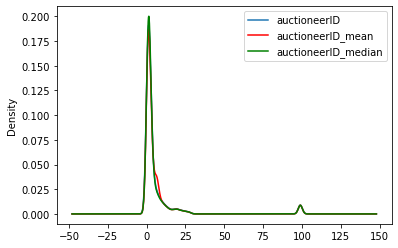

In [45]:
# check for change in distribution
fig = plt.figure()
ax = fig.add_subplot(111)
XTrain["auctioneerID"].plot(kind='kde',ax=ax)
XTrain['auctioneerID_mean'].plot(kind='kde',ax=ax,color = 'red')
XTrain['auctioneerID_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

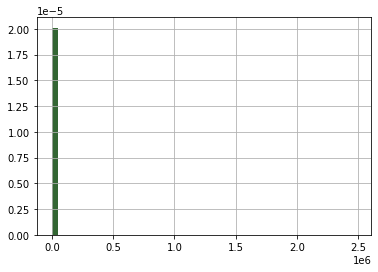

In [46]:
# check for changes in the distribution for numerical variables
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
XTrain['MachineHoursCurrentMeter'].hist(bins=50,ax=ax,density = True, color='red')
# data after imputing
XTrain['MachineHoursCurrentMeter_mean'].hist(bins=50,ax=ax,density = True, color='magenta')
XTrain['MachineHoursCurrentMeter_median'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show

In [47]:
# ideally we would want the variance the variance not disturbed
# more change , change in covariance with other variables
XTrain.cov()

,MachineID,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median,MachineID_mean,MachineID_median
MachineID,2.053930e+11,47456.830373,-1.329254e+07,45085.542477,-28558.004689,-2.374737e+06,2.776919e+07,2.053930e+11,2.053930e+11
auctioneerID,4.745683e+04,292.021709,2.219861e+04,292.021709,292.021709,3.926714e+03,3.838909e+03,4.745638e+04,4.745542e+04
MachineHoursCurrentMeter,-1.329254e+07,22198.610165,1.524489e+09,20881.626198,16879.544720,1.524489e+09,1.524489e+09,-1.329254e+07,-1.329254e+07
auctioneerID_mean,4.508554e+04,292.021709,2.088163e+04,277.431989,277.431989,3.730531e+03,3.647113e+03,4.508541e+04,4.508449e+04
auctioneerID_median,-2.855800e+04,292.021709,1.687954e+04,277.431989,278.419630,3.015554e+03,2.886236e+03,-2.855792e+04,-2.855879e+04
MachineHoursCurrentMeter_mean,-2.374737e+06,3926.713972,1.524489e+09,3730.531105,3015.553770,2.723520e+08,2.723520e+08,-2.374730e+06,-2.374730e+06
MachineHoursCurrentMeter_median,2.776919e+07,3838.909078,1.524489e+09,3647.113038,2886.236156,2.723520e+08,2.745930e+08,2.776911e+07,2.776900e+07
MachineID_mean,2.053930e+11,47456.377763,-1.329254e+07,45085.405919,-28557.918191,-2.374730e+06,2.776911e+07,2.053923e+11,2.053923e+11
MachineID_median,2.053930e+11,47455.416490,-1.329254e+07,45084.492672,-28558.794016,-2.374730e+06,2.776900e+07,2.053923e+11,2.053923e+11


In [48]:
XTrain.corr()

,MachineID,auctioneerID,MachineHoursCurrentMeter,auctioneerID_mean,auctioneerID_median,MachineHoursCurrentMeter_mean,MachineHoursCurrentMeter_median,MachineID_mean,MachineID_median
MachineID,1.000000,0.006186,-0.000565,0.005973,-0.003776,-0.000318,0.003698,1.000000,1.000000
auctioneerID,0.006186,1.000000,0.037182,1.000000,1.000000,0.017244,0.016804,0.006186,0.006186
MachineHoursCurrentMeter,-0.000565,0.037182,1.000000,0.029411,0.023732,1.000000,1.000000,-0.000565,-0.000565
auctioneerID_mean,0.005973,1.000000,0.029411,1.000000,0.998225,0.013571,0.013214,0.005973,0.005973
auctioneerID_median,-0.003776,1.000000,0.023732,0.998225,1.000000,0.010951,0.010438,-0.003776,-0.003777
MachineHoursCurrentMeter_mean,-0.000318,0.017244,1.000000,0.013571,0.010951,1.000000,0.995911,-0.000318,-0.000318
MachineHoursCurrentMeter_median,0.003698,0.016804,1.000000,0.013214,0.010438,0.995911,1.000000,0.003698,0.003698
MachineID_mean,1.000000,0.006186,-0.000565,0.005973,-0.003776,-0.000318,0.003698,1.000000,1.000000
MachineID_median,1.000000,0.006186,-0.000565,0.005973,-0.003777,-0.000318,0.003698,1.000000,1.000000


# **FINDINGS**
* Only three numerical colummns have missing values.
* auctioneerID (4%), MachineHoursCurrentMeter (82%), MachineID
* Using the mean/ median imputation on ,MachineHoursCurrentMeter, auctioneer ID changes the distribution of the data
* No significant change in distribution on mean/median imputation for MachineID.
* The change in variance leads to change in covariance hence change in correlation.

<AxesSubplot:>

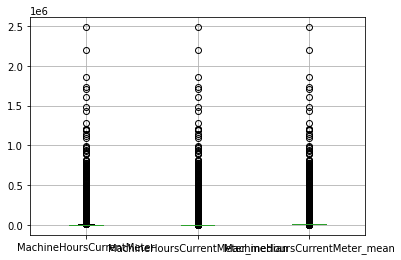

In [49]:
# check for ouliers
# box plot to check for outliers
XTrain[['MachineHoursCurrentMeter','MachineHoursCurrentMeter_median', 'MachineHoursCurrentMeter_mean']].boxplot()